In [45]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

display(train)
display(test)

train.drop(["registered", "casual"], axis=1, inplace=True)
display(train)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [49]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.drop("datetime", axis=1, inplace=True)

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = pd.DatetimeIndex(test['datetime']).year
test['month'] = pd.DatetimeIndex(test['datetime']).month
test['day'] = pd.DatetimeIndex(test['datetime']).day
test['hour'] = pd.DatetimeIndex(test['datetime']).hour
test['minute'] = pd.DatetimeIndex(test['datetime']).minute
test['second'] = pd.DatetimeIndex(test['datetime']).second
test.drop("datetime", axis=1, inplace=True)

display(train)
display(test)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0


<Axes: ylabel='count'>

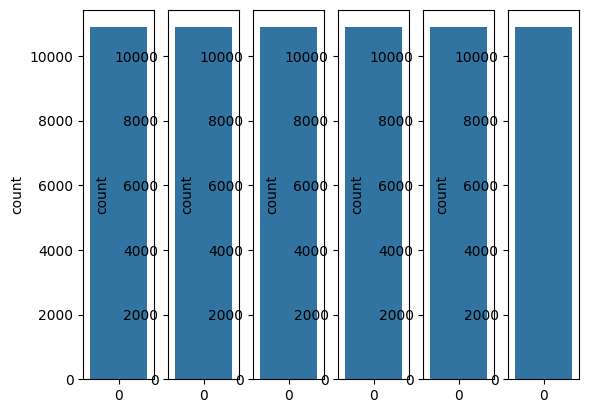

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=6)

sns.countplot(train['year'], ax=ax[0])
sns.countplot(train['month'], ax=ax[1])
sns.countplot(train['day'], ax=ax[2])
sns.countplot(train['hour'], ax=ax[3])
sns.countplot(train['minute'], ax=ax[4])
sns.countplot(train['second'], ax=ax[5])

In [52]:
x = train.loc[:, train.columns!='count'].to_numpy()
y = train['count'].to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

mse=19945.370053754203, rmse=141.22807813517184


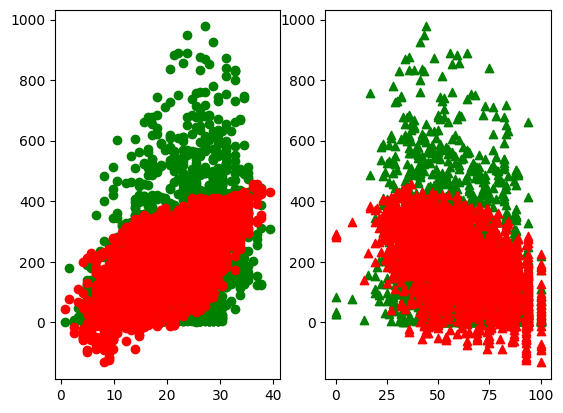

In [70]:
import numpy as np


def MSE(a, b):
    return ((a - b)**2).mean()


y_pred = model.predict(x_test)
mse = MSE(y_test, y_pred)
print(f"mse={mse}, rmse={np.sqrt(mse)}")

fig, ax = plt.subplots(ncols=2)
ax[0].scatter(x_test[:, 4], y_test, c="g", marker="o")
ax[0].scatter(x_test[:, 4], y_pred, c="r", marker="o")

ax[1].scatter(x_test[:, 6], y_test, c="g", marker="^")
ax[1].scatter(x_test[:, 6], y_pred, c="r", marker="^")